In [ ]:
#Install the necessary packages

#!pip install yfinance
#!pip install matplotlib==3.5.3

In [ ]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime, timedelta

#Finance packages
import yfinance as yf

#Optimization
import cvxpy as cp

#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

### Portfolio Optimization: Modern Portfolio Theory (Mean-Variance Analysis)

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz in the 1950s. It is based on the idea that investors can maximize their expected return on investment by diversifying their portfolio across a range of assets. According to MPT, the expected return on a portfolio is determined by the combination of the individual returns of the assets within the portfolio and their corresponding risk levels. The risk of an asset is measured by its standard deviation, which is a measure of the amount of variation in the asset's return. MPT also introduces the concept of the efficient frontier, which is a curve that represents the portfolios that offer the highest expected return for a given level of risk. Portfolios that lie on the efficient frontier are considered to be optimal, as they offer the highest expected return for a given level of risk. MPT has been influential in the field of finance and has been widely adopted by investors and financial managers. However, it has also been criticized for its assumptions about investor behavior and its reliance on historical data.

**Assumptions**:

- Investors are rational and aim to maximize their expected return.
- Investors are risk averse and seek to minimize their risk.
- Asset returns are approximately normally distributed$^*$

$^*$This is indeed not true. The real assumption is that the *utility* of the investor can be well approximated by a quadratic form, which allows to be described by a function of only the first and second moments of the return distribution. But saying that returns are normally distributed is easier.

Under these assumptions, MPT introduces several key concepts and formulas to help investors create an optimal portfolio. We consider $N$ risky assets in which the investor might or not invest. The goal is then to obtain the proportion of the investor's money, or weight, $\omega_i$, that he/she should invest in each asset $i$. Thus, a portfolio is defined by a unique set of weights $\{\omega\}$, or in a more useful and precise way, by a vector $\vec{\omega}$ in which, as previously said, $\omega_i$ indicates the proportion of the investor's wealth allocated in each asset $i$. Being this definition clear, let $\vec{R}$ be the return matrix of the considered assets in which the element $r_{ij}$ is the return of asset $i$ at time $j$. Thus, the components of the mean return vector, $\vec{\mu}$, of the considered assets are defined as $\mu_i=\frac{1}{t}\sum_{j=1}^tr_{ij}$. With this information, we define the following statistical measures over a given portfolio:

<ins>**Expected Return**</ins>

The expected return of a portfolio is calculated as the sum of the expected returns of each asset multiplied by their respective weights in the portfolio:

$$ \mu_p=E[R_p] = \sum_{i=1}^N w_iE[R_i]=\vec{\omega}^T \vec{\mu} $$

where:

- $\mu_P$ is the expected return of the portfolio
- $w_i$ is the weight of asset $i$ in the portfolio
- $E[R_i]$ is the expected return of asset $i$
- $N$ is the number of assets in the portfolio

<ins>**Standard Deviation**</ins>

The standard deviation of a portfolio is calculated as the square root of the sum of the covariance between each pair of assets multiplied by their respective weights:

$$ \sigma_P=\sqrt{V[R_p]} = \sqrt{\sum_{i=1}^N\sum_{i=1, j=1}^N w_i\,\Sigma\,w_j}=\sqrt{\vec{\omega}^T\,\vec{\Sigma}\,\vec{\omega}}$$

where:

- $\sigma_P$ is the standard deviation of the portfolio
- $w_i$ is the weight of asset $i$ in the portfolio
- $\Sigma=Cov(R_i,R_j)$ is the covariance between assets $i$ and $j$
- $N$ is the number of assets in the portfolio

<ins>**Standard Deviation**</ins>

The standard deviation of a portfolio is the square root of the variance:

$$ \sigma_p = \sqrt{\sigma_P^2} $$

where:

- $\sigma_p$ is the standard deviation of the portfolio
- $\sigma_P^2$ is the variance of the portfolio

<ins>**Sharpe Ratio**</ins>

The Sharpe ratio is a measure of the risk-adjusted return of a portfolio. It is calculated as the excess return (the difference between the expected return and the risk-free rate) divided by the standard deviation:

$$ SR = \frac{\mu_P - R_f}{\sigma_p} $$

where:

- $SR$ is the Sharpe ratio
- $\mu_P$ is the expected return of the portfolio
- $R_f$ is the risk-free rate
- $\sigma_p$ is the standard deviation of the portfolio

To obtain the optimal portfolio we have to **maximize** the following objective function

$$f(\lambda, \vec{\omega})=(1-\lambda)\mu_P - \lambda \sigma_P^2 \quad \textrm{with} \quad \lambda\in(0,1)$$

or, equivalently, **minimize** the following one

$$f(\lambda, \vec{\omega})=\lambda\sigma^2_P - (1-\lambda)\mu_P \quad \textrm{with} \quad \lambda\in(0,1)$$

subject to some constraints:

- $\sum_i\omega_i=1$, this is, all money considered must be allocated.
- $w_i>0$ if we don't want to allow for short selling.

and some other restrictions could be added.

The $\lambda$ parameter is called the investor's risk aversion. Note that if $\lambda=0$ (the investor is not risk-averse), the optimization problem reduces to maximizing the expected return regardless of the risk involved. On the other hand, for $\lambda=1$ (most risk-averse investor, does not want "any" risk), the problem reduces to minimze the variance regardless of the expected return.

Solving the optimization problem for several values of $\lambda\in(0,1)$ we can compute the **Efficient Frontier**, which basically depicts the portfolios maximizing the returns for every predefined value of risk.

# The cvxpy library for solving *Convex Optimization Problems* relying on Disciplined Convex Programming (DCP)

CVXPY is an open source Python-embedded modeling language for convex optimization problems. It lets you express your problem in a natural way that follows the math, rather than in the restrictive standard form required by solvers.

Disciplined convex programming (DCP) is a system for constructing mathematical expressions with known curvature from a given library of base functions. CVXPY uses DCP to ensure that the specified optimization problems are convex.

Check it out at: https://www.cvxpy.org/

# Exercise 1. Classical (Markowitz) portfolio optimization

Implement the Mean-Variance model without allowing for short selling. This reduces to the following optimization problem:

\begin{equation}
\begin{array}{ll} \mbox{maximize} & (1-\lambda)\mu^T w - \lambda w^T\Sigma w\\
\mbox{subject to} & \sum_i w_i = 1, \quad w_i > 0 \ \forall i,
\end{array}
\end{equation}

**1. Download the data from several stocks and compute the log returns**

In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2018, 1, 1)

#Apple, Microsoft, Amazon, Google, Nvidia, Telefonica, Santander, BBVA, Endesa
assets = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA", "TEF.MC", "SAN.MC", "BBVA.MC", "ELE.MC"]

df = yf.download(assets, start=start, end=end, interval="1d", progress=False, ignore_tz=True)["Adj Close"]

df_returns = np.log(1+df.pct_change()).dropna()

**2. Set the problem to be solved by DCP**

I provide the code for you, but look it carefully and try to understand it. Later you will have to implement it with some slight modifications.

In [ ]:
#Define and set the number of assets under consideration
N = len(df.columns)
#Define and set the mean return of the assets
mu = df_returns.mean().values
#Define and set the covariance matrix of the returns
Sigma = df_returns.cov().values

#Initialize the weight vector as cp.Variable(N) of the cvxpy framework
w = cp.Variable(N)
#Investor risk aversion parameter
risk_aversion = cp.Parameter(nonneg=True)

#Define how the mean return of the portfolio is computed: ret = w^T * mu
mean_P = mu.T @ w #(@ performs matrix multiplication in Python)
#Define how the variance of the portfolio is computed,  w^T*mu*w, which is a quadratic form
var_P = cp.quad_form(w, Sigma)

#Define expression to be solved
expression = cp.Maximize((1-risk_aversion)*mean_P - risk_aversion*var_P)
##Define the constraints
constraints = [cp.sum(w)==1, w>=0]

#Define the problem
prob = cp.Problem(expression, constraints)

**3. Solving the problem for a given risk aversion value**

Here I show you how to solve the defined optimization problem and obtain the optimal values. Check it out and play a little bit with the risk aversion parameter.

In [ ]:
#Set the value for the parameter
risk_aversion.value = 0.2

#Solve the problem
prob.solve()

#Obtain the optimal values
opt_ret = mean_P.value
opt_var = var_P.value
opt_w = w.value

print("Opt annualized returns:\t  ", opt_ret*252)
print("Opt annualized volatility:", np.sqrt(opt_var*252))
print("Sharpe Ratio:\t\t  ", opt_ret*252/np.sqrt(opt_var*252))
print("Optimal weights:\n", pd.DataFrame(opt_w, index=df.columns, columns=['Opt Weight']).T)

Opt annualized returns:	   0.2871138711440551
Opt annualized volatility: 0.3128950636474183
Sharpe Ratio:		   0.9176043488739266
Optimal weights:
 Ticker              AAPL      AMZN       BBVA.MC        ELE.MC         GOOGL  \
Opt Weight -1.452298e-23  0.281206  2.553275e-23 -7.684744e-23 -6.883276e-23   

Ticker              MSFT      NVDA        SAN.MC        TEF.MC  
Opt Weight  8.254333e-23  0.718794  1.371355e-22  3.148985e-23  


**4. Compute the efficient frontier**

- Plot the efficient frontier as a scatter plot coloured according to the Sharpe Ratio. Plot together the individual stocks.

- Plot the mean value of the weight for each company. What do you observe?

In [ ]:
def eff_frontier(prob):
    # Number of values in the Efficient Frontier
    N_ef = 300
    # Risk aversion parameter : λ∈(0,1)
    lambdas = np.linspace(0, 1, N_ef)

    # Initialize arrays to store results
    risk_vals = []; ret_vals = []; SR_vals = [];
    weights = np.zeros((N_ef, N))

    # Optimization loop to compute the efficient frontier
    for i in range(N_ef):
        # Solve the problem given a lambda
        risk_aversion.value = lambdas[i]
        prob.solve()

        # Annualized values stored
        ret = mean_P.value * 252    ;       ret_vals.append(ret)
        vol = np.sqrt(var_P.value * 252) ;  risk_vals.append(vol)
        SR_vals.append(ret/vol)
        weights[i, :] = w.value

    # Create DataFrame
    frontier_df = pd.DataFrame({
        'Risk': risk_vals,
        'Return': ret_vals,
        'SR': SR_vals
    })
    return frontier_df, weights

frontier_df, weights = eff_frontier(prob)

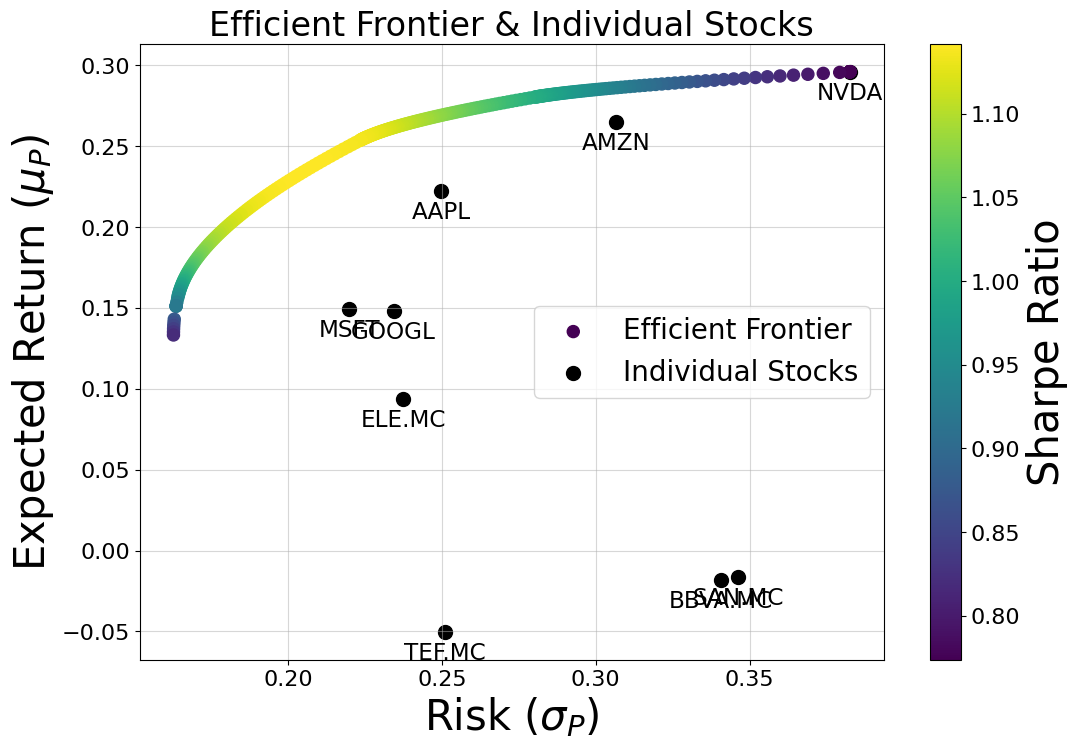

In [ ]:
def eff_frontier_plot(frontier_df):
    ### Figure
    plt.figure(figsize=(12, 8))

    # Plot the efficient frontier
    scat = plt.scatter(frontier_df['Risk'], frontier_df['Return'], c=frontier_df['SR'],
                cmap='viridis', s=75, zorder=2,
                label='Efficient Frontier')
    plt.colorbar(scat, label="Sharpe Ratio")

    # Plot stocks
    sigma_P = np.sqrt(np.diag(Sigma) * 252)
    mu_P = mu * 252
    plt.scatter(sigma_P, mu_P, color="k", s=100, label='Individual Stocks')
    for i in range(len(df.columns)):
        plt.text(sigma_P[i], mu_P[i] - 0.02, df.columns.values[i],
                size= 'small', ha='center', va='bottom')

    # Title, labels, etc.
    plt.title("Efficient Frontier & Individual Stocks")
    plt.xlabel(r"Risk ($\sigma_P$)")
    plt.ylabel(r"Expected Return ($\mu_P$)")
    plt.legend(loc='best')
    plt.grid(alpha=0.5, zorder=1)

eff_frontier_plot(frontier_df)

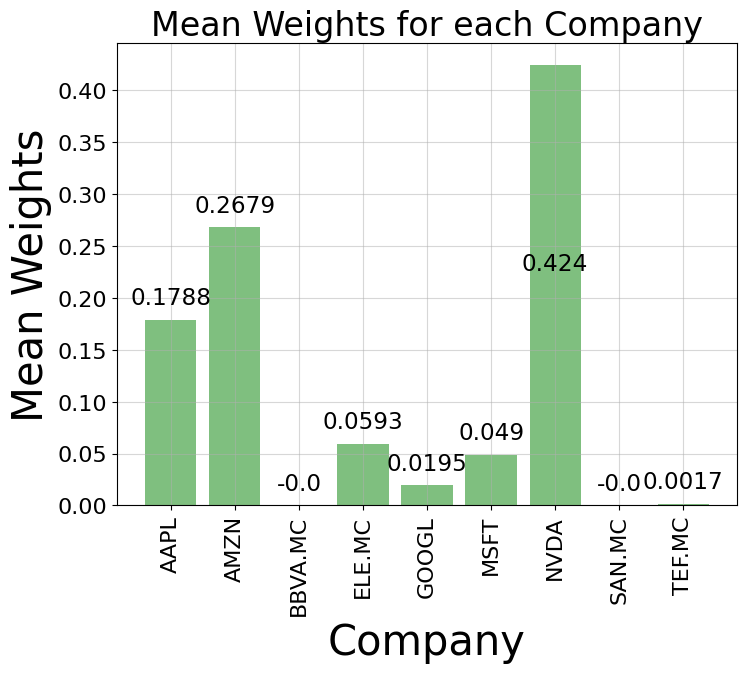

In [ ]:
def eff_frontier_bars(mean_weights):
    ### Figure
    plt.figure()

    # Bar colours
    c = ['green' if weight > 0 else 'red' for weight in mean_weights]

    bars = plt.bar(df.columns, mean_weights, color = c, alpha=0.5)

    # Add numerical values to each bar
    for bar, weight in zip(bars, mean_weights):
        x_val = bar.get_x() + bar.get_width() / 2
        y_val = bar.get_height() * (1 if bar.get_height() < .4 else 1/2)
        plt.text(x_val, y_val + 0.01, round(weight, 4),
                size='small',ha='center', va='bottom')

    # Title, labels, etc.
    plt.title('Mean Weights for each Company')
    plt.xticks(rotation=90)
    plt.xlabel('Company')
    plt.ylabel('Mean Weights')
    #plt.yscale('log')
    plt.grid(alpha=0.5)

# Calculate mean weight for each company
mean_weights = np.mean(weights, axis=0) # 0: mean is computed along the columns
# Plot mean weights by companies
eff_frontier_bars(mean_weights)

La mayoría del peso esta atribuido a NVDA, esto tiene sentido ya que es la compañia que cae más cerca de la frontera de eficacia. Tiene un retorno esperado muy alto comparado con el resto de las compañias (aunque tambien tiene un riesgo asociado igual de alto). Por otra parte, AAPL y AMZN estan bastante cerca de la frontera, es por ello que tienen un peso significativamente más alto que el resto de compañias. Estas sirven de contrapeso para mitigar el riesgo de NVDA.

**5. Save the weights (in a variable) of the optimal portfolio (the one yielding highest Sharpe Ratio)**

In [ ]:
max_sharpe_idx = np.argmax(frontier_df['SR'])
opt_weights = weights[max_sharpe_idx]

pd.DataFrame(opt_weights, index=df.columns, columns=['Opt Weight']).T

Ticker,AAPL,AMZN,BBVA.MC,ELE.MC,GOOGL,MSFT,NVDA,SAN.MC,TEF.MC
Opt Weight,0.391239,0.297545,8.116579e-23,0.077741,-9.388510e-23,0.055149,0.178326,-7.441494e-23,-1.110794e-22


#Exercise 2. Portfolio optimization allowing for short-selling

Now we relax our constraint $w_i>0 \ \forall i$. Thus, negative weights are understood as fractions of the money devoted to short selling a particular stock.

**1. Define the problem**

If we remove `w>=0` in `constraints = [cp.sum(w)==1, w>=0]`, then the weight of a given company could get in the thousands, meaning we would invest thousands of times the money in our wallet (not a great idea).

The solution is to keep the weights between 1 and -1, $|w| \leq 1$, therefore adding constrains:


```
constraints = [cp.sum(w)==1, w<=1, w>=-1]
```



In [ ]:
#Define the new constraints
new_constraints = [cp.sum(w)==1, w<=1, w>=-1]

#Define the problem
prob_short_sell = cp.Problem(expression, new_constraints)

**2. Compute and plot the efficient frontier**

In [ ]:
#Compute new Returns, Risk & Sharpie Ratio along the Weight matrix
frontier_shortsell_df, weights_shortsell = eff_frontier(prob_short_sell)

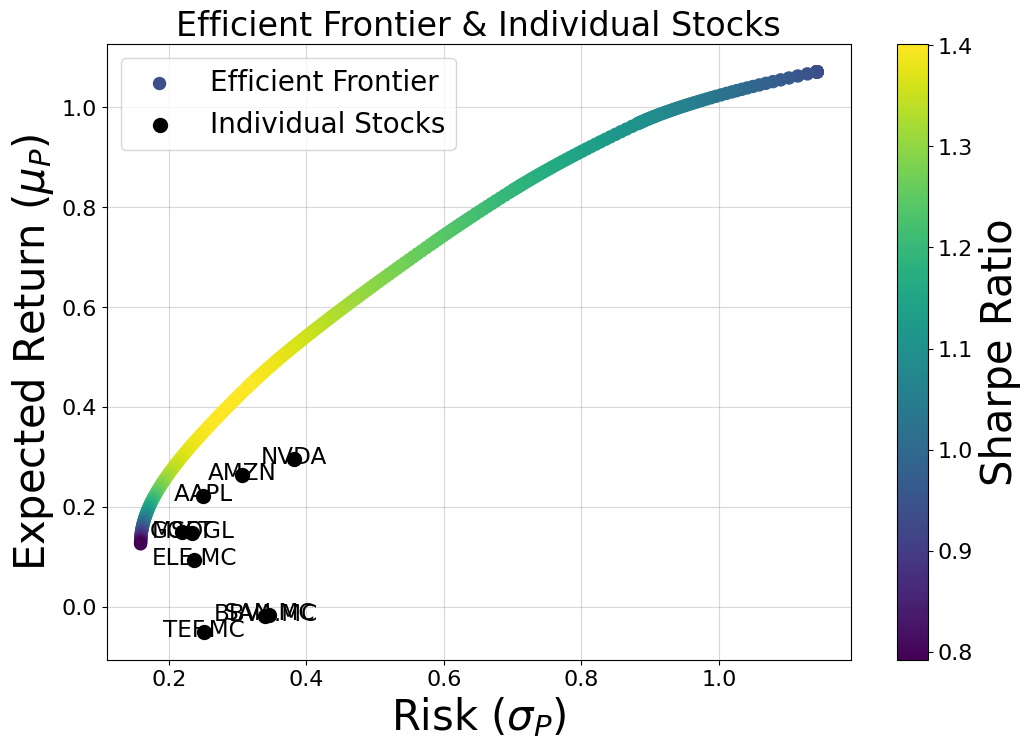

In [ ]:
#Plot Efficient Frontier
eff_frontier_plot(frontier_shortsell_df)

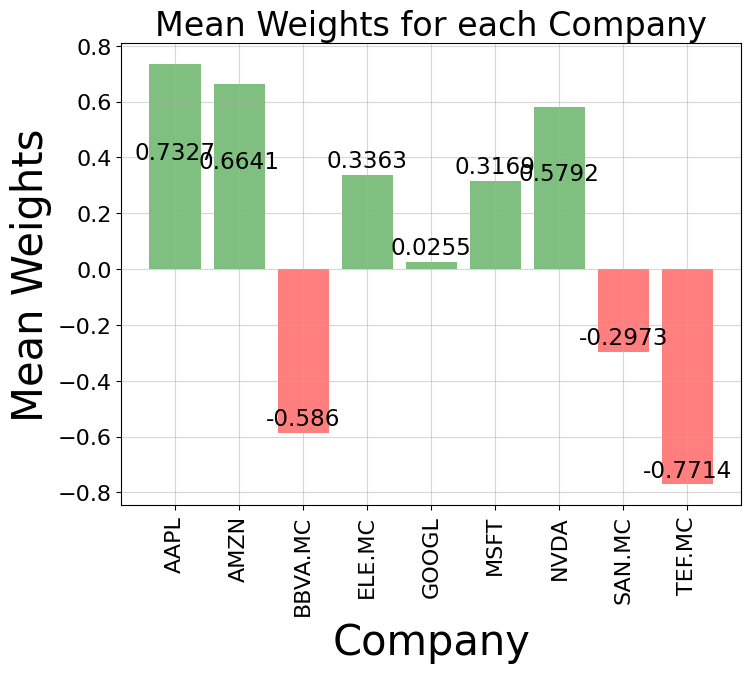

In [ ]:
# Calculate mean weight for each company
mean_w_shortsell = np.mean(weights_shortsell, axis=0)
# Plot mean weights by companies
eff_frontier_bars(mean_w_shortsell)

**3. Save the weights (in a variable) of the optimal portfolio (the one yielding highest Sharpe Ratio)**

In [ ]:
max_sharpe_idx = np.argmax(frontier_df['SR'])
opt_weights_short_sell = weights[max_sharpe_idx]

pd.DataFrame(opt_weights_short_sell, index=df.columns, columns=['Opt Weight Short Selling']).T

Ticker,AAPL,AMZN,BBVA.MC,ELE.MC,GOOGL,MSFT,NVDA,SAN.MC,TEF.MC
Opt Weight Short Selling,0.391239,0.297545,8.116579e-23,0.077741,-9.388510e-23,0.055149,0.178326,-7.441494e-23,-1.110794e-22


In [ ]:
opt_weights
opt_weights_short_sell
eq_weights = np.full(N, 1/N)

# Exercise 3. Future performance of optimal portfolios

1. Implement the optimal portfolios from the previous models (the ones yielding highest Sharpe Ratio) and check their performance in the period 2018-2023.

2. Implement the Equally Weighted (EW) portfolio and compare it to the other two.

  In the EW portfolio the weights are simply given by $w_i=1/N$.

3. Make a detailed analysis of the performance of the three portfolios. Compute:

  * Annualized return
  * Annualized volatility
  * Sharpe Ratio
  * Maximum Drawdown (MDD)

    A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained

    $$MDD(T)=max_{\tau\in(0,T)}D(\tau)=max_{\tau\in(0,T)}\left[max_{t\in(0,\tau)}X(t)-X(\tau)\right]$$

    Put it simple: the maximum loss from a peak to a subsequent trough in a given time period. It is usually computed as a percentage

    $$MDD=\frac{Peak-Trough}{Peak}\cdot 100$$

  * Return over Maximum Drawdown (RoMaD)

    The RoMaD is computed as the average return divided by the MDD in a given period

    $$RoMaD(T)=\frac{\left<R\right>_T}{MDD(T)}$$

**1. Download the data**

In [ ]:
start = datetime(2018, 1, 1)
end = datetime(2023, 1, 1)

#Apple, Microsoft, Amazon, Google, Nvidia, Telefonica, Santander, BBVA, Endesa
assets = ["AAPL", "MSFT", "AMZN", "GOOGL", "NVDA", "TEF.MC", "SAN.MC", "BBVA.MC", "ELE.MC"]

df = yf.download(assets, start=start, end=end, interval="1d", progress=False, ignore_tz=True)["Adj Close"].dropna()

df_returns = np.log(1+df.pct_change()).dropna()

**2. Compute Efficent Frontiers**

In [ ]:
#Define and set the number of assets under consideration
N = len(df.columns)
#Define and set the mean return of the assets
mu = df_returns.mean().values
#Define and set the covariance matrix of the returns
Sigma = df_returns.cov().values

#Initialize the weight vector as cp.Variable(N) of the cvxpy framework
w = cp.Variable(N)
#Investor risk aversion parameter
risk_aversion = cp.Parameter(nonneg=True)

#Define how the mean return of the portfolio is computed: ret = w^T * mu
mean_P = mu.T @ w #(@ performs matrix multiplication in Python)
#Define how the variance of the portfolio is computed,  w^T*mu*w, which is a quadratic form
var_P = cp.quad_form(w, Sigma)

#Define expression to be solved
expression = cp.Maximize((1-risk_aversion)*mean_P - risk_aversion*var_P)

#Define the constraints
constraints_orig = [cp.sum(w)==1, w>=0]
constraints_short_sell = [cp.sum(w)==1, w<=1, w>=-1]
constraints_eq_weight = [w==1/N]

#Define the problems
prob_og = cp.Problem(expression, constraints_orig)
prob_ss = cp.Problem(expression, constraints_short_sell)
prob_ew = cp.Problem(expression, constraints_eq_weight)

#Define the Efficent Frontiers
frontier_df_og, weights_og = eff_frontier(prob_og)
frontier_df_ss, weights_ss = eff_frontier(prob_short_sell)
frontier_df_ew, weights_eq = eff_frontier(prob_ew)

#Name the different DataFrames & Combine
frontier_combined_df = pd.concat(
    [frontier_df_og, frontier_df_ss, frontier_df_ew],
    keys=['Original', 'Short Sell', 'Equal Weights'],
    names=['Type', 'Index'])

frontier_combined_df

Risk    Return        SR
Type          Index                              
Original      0      0.337147  0.233521  0.692638
              1      0.337147  0.233521  0.692638
              2      0.337147  0.233521  0.692638
              3      0.337147  0.233521  0.692638
              4      0.337147  0.233521  0.692638
...                       ...       ...       ...
Equal Weights 295    0.238491  0.079314  0.332565
              296    0.238491  0.079314  0.332565
              297    0.238491  0.079314  0.332565
              298    0.238491  0.079314  0.332565
              299    0.238491  0.079314  0.332565

[900 rows x 3 columns]

In [ ]:
# Initiate combined DataFrames
opt_weights_df = pd.DataFrame({}, index=df.columns)
portfolio_returns_df = pd.DataFrame()

# Find the optimal weights for each type
for portfolio_type, weights in zip(['Original', 'Short Sell', 'Equal Weights'], [weights_og, weights_ss, weights_eq]):

    frontier_df = frontier_combined_df.xs(portfolio_type, level='Type')

    # Compute optimal weight
    max_sharpe_idx = frontier_df['SR'].idxmax()
    opt_weights = weights[max_sharpe_idx]
    opt_weights_df[portfolio_type] = opt_weights # Store them aside

    # Compute portfolio returns
    portfolio_returns = df_returns @ opt_weights
    portfolio_returns_df[portfolio_type] = portfolio_returns

# Display the combined DataFrames side by side
display(opt_weights_df, portfolio_returns_df)

,Original,Short Sell,Equal Weights
Ticker,,,
AAPL,3.829550e-01,5.060230e-02,0.111111
AMZN,2.839749e-24,1.289869e-01,0.111111
BBVA.MC,1.956270e-24,3.974637e-03,0.111111
ELE.MC,1.649768e-01,4.657165e-01,0.111111
GOOGL,4.893523e-23,7.157418e-02,0.111111
MSFT,4.520682e-01,3.918656e-02,0.111111
NVDA,-1.006977e-22,9.042356e-19,0.111111
SAN.MC,-1.755052e-22,3.640540e-19,0.111111
TEF.MC,1.702446e-23,2.399590e-01,0.111111


,Original,Short Sell,Equal Weights
Date,,,
2018-01-03,0.004978,0.010609,0.012721
2018-01-04,0.007731,0.010894,0.011723
2018-01-05,0.009771,0.005518,0.008777
2018-01-08,-0.002459,-0.001935,0.004245
2018-01-09,0.001234,0.005054,0.001975
...,...,...,...
2022-12-23,-0.001025,0.002407,0.002821
2022-12-27,-0.009089,-0.007512,-0.015895
2022-12-28,-0.016969,-0.005150,-0.009059


In [ ]:
# Calculate Maximum DrawDown (MDD) in percentage
def calculate_mdd(portfolio_returns):
    cumulative_returns = (1 + portfolio_returns).cumprod()

    peak = cumulative_returns.cummax()
    trough = cumulative_returns.cummin()

    drawdown = (peak - trough) / peak * 100
    MDD = drawdown.max()
    return MDD

mdds = portfolio_returns_df.apply(calculate_mdd)

# Calculate RoMaD
def calculate_romad(portfolio_returns, mdd):
    average_return = portfolio_returns.mean() * 252  # Annualized average return
    romad = average_return / mdd
    return romad

romad = portfolio_returns_df.apply(lambda x: calculate_romad(x, mdds[x.name]))

**2. Plot the evolution of the price of each portfolio**

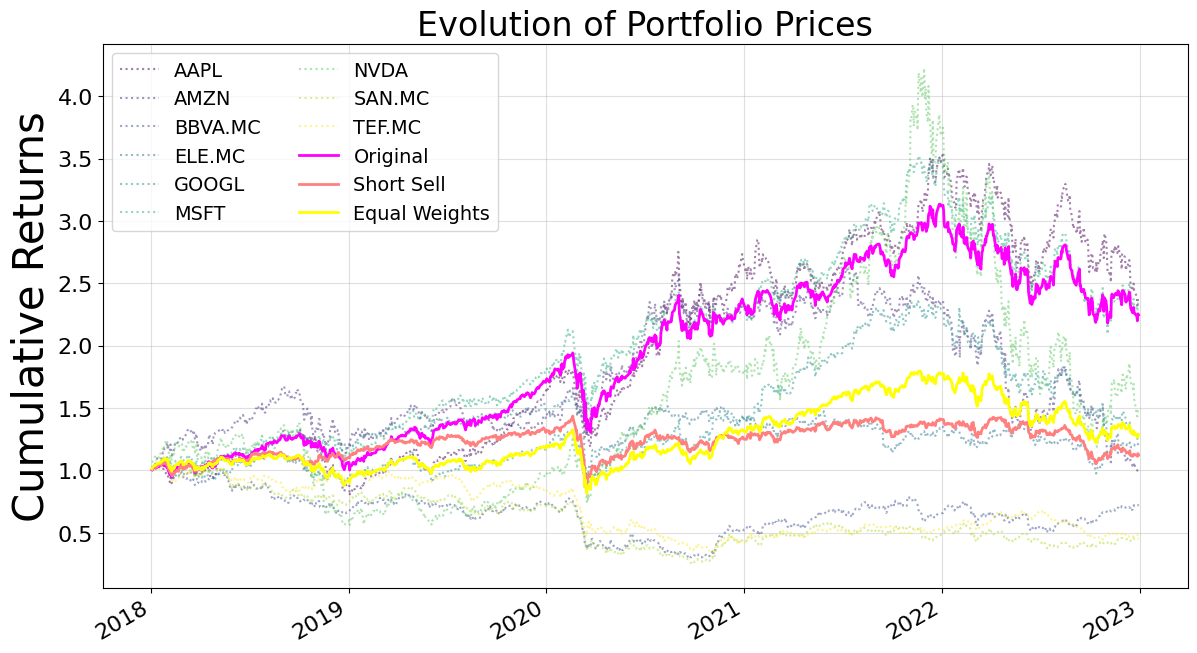

In [ ]:
# Calculate price evolution for each portfolio and company
cumulative_returns_df = (1 + df_returns).cumprod()
portfolio_cumulative_returns_df = (1 + portfolio_returns_df).cumprod()

# Plot the cumulative returns of each portfolio and the original returns in the background
fig, ax = plt.subplots( 1,1, figsize=(14, 8))

# Plot the original returns with alpha=0.3 in the background
cumulative_returns_df.plot(alpha=0.5, linestyle=':', ax=ax, colormap='viridis')

# Plot the cumulative returns of each portfolio
portfolio_cumulative_returns_df.plot(lw = 2, ax=ax, colormap='spring')

plt.xlabel(None)
plt.ylabel('Cumulative Returns')
plt.title('Evolution of Portfolio Prices')
plt.legend(fontsize= 'x-small', ncol= 2)
plt.grid(alpha=0.4)
plt.show()

**3 Detailed analysis**

In [ ]:
pd.DataFrame([mdds, romad], index=['MDD', 'RoMaD'])

,Original,Short Sell,Equal Weights
MDD,69.822913,38.830151,54.603021
RoMaD,0.002857,0.001077,0.001453


Podemos ver que la cartera que obtiene mayores ganancias es la original, la que no permite venta en corto. Vemos que sigue las tendencias de las compañias que mas crecen: Apple, Amazon y Nvidia. Se observa tambien que es la cartera que sufre la mayor pérdida de pico a valle. La cartera de venta en corto es la que obtiene un menor beneficio, esto sorprende a primera vista dado que es una estrategia de inversión más agresiva. Por otro lado, este bajo rendimiento probablemente se deba a que esta cartera presenta un riesgo más alto. Finalmente, la cartera de pesos iguales, proporciona una medida de referencia a la hora de invertir.